In [0]:
%tensorflow_version 1.x

# Steps to build CNN to solve Emergency vs Non-Emergency vehicle classification problem

1. Loading the Dataset
2. Pre-processing the Data
3. Creating Training and Validation set
4. Defining the Model Architecture
5. Compiling the Model
6. Training the Model
7. Evaluating model performance

## 1. Loading the Dataset

In [0]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# unzipping the Dataset.zip file
!unzip /content/drive/My\ Drive/Dataset.zip

In [0]:
# create random number generator
seed = 42

In [0]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [0]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [0]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the Data

In [0]:
# since we are using CNN, we do not have to resize the images into 1D array. 

In [0]:
# normalizing the pixel values
X = X / X.max()

## 3. Creating Training and Validation set

In [0]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [0]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 4. Defining the Model Architecture

![alt text](https://drive.google.com/uc?id=1qsops2ZfESuzjg7-V0rmOfVE0PtErYrJ)

In [0]:
# importing the convolutional and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [0]:
# defining the model architecture

# creating a sequential model 
model = Sequential()
    
# defining input layer with 3D input of shape (224,224,3)
model.add(InputLayer(input_shape=(224, 224, 3)))

# defining the first convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
# printing summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


## Understanding the Architecture
*  Input shape is (224,224,3) since images are of this shape
*  We then applied 25 filters each of shape (5,5) and stride is (1,1)
*  So the output from first convolutional layer is: **(224-5+1,224-5+1,25)** which is **(220,220,25)**
*  We then applied 50 filters of shape (5,5) each with stride (1,1)
*  Then the output is **(220-5+1,220-5+1,50)** which is **(216,216,50)**
*  Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
*  Finally these features are passed through the fully connected layers.


## Understanding the number of parameters of different layers

1.   First Convolutional Layer
    * Number of input channels = 3
    * Number of filters = 25
    * Filter Size = (5,5)
    * Learnable parameters = **25 * 5 * 5 * 3 + 25** (1 bias for each filter) = **1900**
2.   Second Convolutional Layer
    * Number of input channels = 25
    * Number of filters = 50
    * Filter Size = (5,5)
    * Learnable parameters = **50 * 5 * 5 * 25 + 50** (1 bias for each filter) = **31300**
3.   First Fully Connected Layer
    * Number of input features = 216 * 216 * 50 = 2332800
    * Number of neurons in this hidden layer = 100
    * Learnable parameters = **2332800 * 100 + 100** (1 bias for each neuron) = **233280100**
3.   Output Layer
    * Number of input features = 100
    * Number of neurons in this layer = 1
    * Learnable parameters = **100 * 1 + 1** (1 bias for each neuron) = **101**



## 5. Compiling the Model

In [0]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 6. Training the Model

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))




Train on 1646 samples, validate on 706 samples
Epoch 1/10





1646/1646 [==============================] - 47s 28ms/step - loss: 0.7202 - acc: 0.5595 - val_loss: 0.6847 - val_acc: 0.5595
Epoch 2/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.6440 - acc: 0.6452 - val_loss: 0.6705 - val_acc: 0.5892
Epoch 3/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.6237 - acc: 0.6452 - val_loss: 0.6033 - val_acc: 0.6686
Epoch 4/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.5969 - acc: 0.6859 - val_loss: 0.5952 - val_acc: 0.6700
Epoch 5/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.6140 - acc: 0.6628 - val_loss: 0.5878 - val_acc: 0.6884
Epoch 6/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.5812 - acc: 0.7023 - val_loss: 0.6073 - val_acc: 0.6756
Epoch 7/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.5630 - acc: 0.7108 - val_loss: 0.5667 - val_acc: 

## 7. Evaluating model performance

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.7612393681652491 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7195467422096318 %


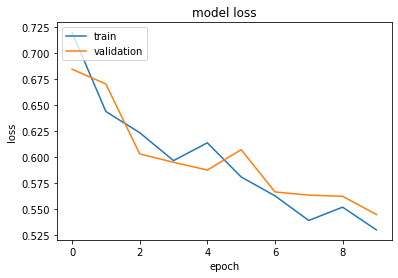

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

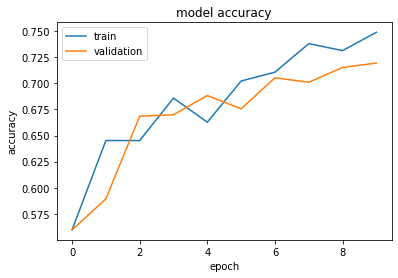

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Adding Maxpool layer to reduce parameters

In [0]:
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [0]:
# defining the model architecture with maxpool layer
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# adding maxpool layer after the convolutional layers
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
# summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
__________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6813 - acc: 0.5632 - val_loss: 0.6861 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6649 - acc: 0.5887 - val_loss: 0.6611 - val_acc: 0.5921
Epoch 3/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6552 - acc: 0.6130 - val_loss: 0.6487 - val_acc: 0.6161
Epoch 4/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6409 - acc: 0.6349 - val_loss: 0.6330 - val_acc: 0.6657
Epoch 5/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6272 - acc: 0.6622 - val_loss: 0.6193 - val_acc: 0.6799
Epoch 6/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6155 - acc: 0.6671 - val_loss: 0.6079 - val_acc: 0.6841
Epoch 7/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6075 - acc: 0.6792 - val_loss: 0.5991 - val_acc: 0.6941
Epoch 8/

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

NameError: ignored

In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

NameError: ignored

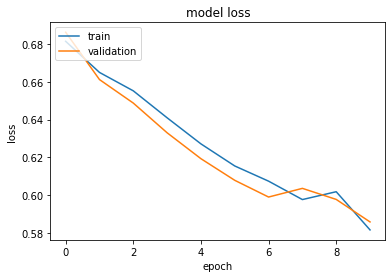

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

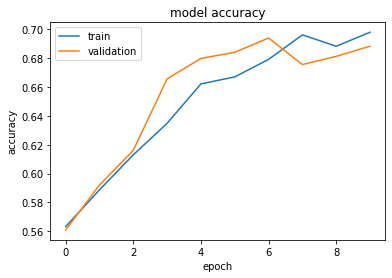

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Hyperparameter Tuning of Convolutional Neural Networks

1. increase number of convolutional layers
2. increase number of pooling layers
3. increase number of convolutional filters
4. change size of convolutional filters
5. change pooling type 
6. change padding technique
7. change stride

#### Hyperparameters of fully connected layers

1. change activation function of hidden layer
2. increase hidden neurons
3. increase hidden layers
4. increase number of epochs
5. change optimizer
6. add batch normalization layer
7. add dropout layer

## 1. Increasing number of convolutional layers

In [0]:
# increase number of convolutional layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 212, 212, 50)      62550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 140450)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               14045100  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 45s 27ms/step - loss: 0.6797 - acc: 0.5857 - val_loss: 0.6766 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6687 - acc: 0.5869 - val_loss: 0.6661 - val_acc: 0.5652
Epoch 3/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6597 - acc: 0.6009 - val_loss: 0.6572 - val_acc: 0.5892
Epoch 4/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6502 - acc: 0.6179 - val_loss: 0.6447 - val_acc: 0.6530
Epoch 5/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6447 - acc: 0.6252 - val_loss: 0.6306 - val_acc: 0.6501
Epoch 6/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6330 - acc: 0.6452 - val_loss: 0.6230 - val_acc: 0.6671
Epoch 7/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6262 - acc: 0.6640 - val_loss: 0.6195 - val_acc: 0.6586
E

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.6852976913730255 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6728045325779037 %


## 2. Increasing number of pooling layers

In [0]:
# increase number of pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 25)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 50)        31300     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               720100    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6820 - acc: 0.5832 - val_loss: 0.6840 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6764 - acc: 0.5863 - val_loss: 0.6836 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6753 - acc: 0.5863 - val_loss: 0.6831 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6741 - acc: 0.5863 - val_loss: 0.6828 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6731 - acc: 0.5863 - val_loss: 0.6809 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6727 - acc: 0.5863 - val_loss: 0.6801 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6711 - acc: 0.5863 - val_loss: 0.6790 - val_acc: 0.5609
Epoch 8/10
1646

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

## 3. Increasing number of convolutional filters

In [0]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 216, 216, 75)      93825     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 75)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 218700)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               21870100  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 21,967,826
Trainable params: 21,967,826
Non-trainable params: 0
__________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))



Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 53s 32ms/step - loss: 0.7113 - acc: 0.5468 - val_loss: 0.6912 - val_acc: 0.5510
Epoch 2/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6662 - acc: 0.6063 - val_loss: 0.6732 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6532 - acc: 0.6173 - val_loss: 0.6541 - val_acc: 0.6034
Epoch 4/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6375 - acc: 0.6513 - val_loss: 0.6341 - val_acc: 0.6530
Epoch 5/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6394 - acc: 0.6495 - val_loss: 0.6355 - val_acc: 0.6303
Epoch 6/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6349 - acc: 0.6440 - val_loss: 0.6250 - val_acc: 0.6530
Epoch 7/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6257 - acc: 0.6519 - val_loss: 0.6087 - val_acc: 0.6728

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.7168894289185905 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6883852691218131 %


## 4. Changing size of convolutional filters

In [0]:
# change filter size for convolutional layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 25)      700       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 50)      11300     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 50)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 151250)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15125100  
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 15,137,201
Trainable params: 15,137,201
Non-trainable params: 0
__________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6765 - acc: 0.5863 - val_loss: 0.6781 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6675 - acc: 0.5863 - val_loss: 0.6679 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6594 - acc: 0.5923 - val_loss: 0.6606 - val_acc: 0.5652
Epoch 4/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6520 - acc: 0.6118 - val_loss: 0.6514 - val_acc: 0.6062
Epoch 5/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6445 - acc: 0.6245 - val_loss: 0.6423 - val_acc: 0.6360
Epoch 6/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6354 - acc: 0.6555 - val_loss: 0.6371 - val_acc: 0.6133
Epoch 7/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6261 - acc: 0.6725 - val_loss: 0.6306 - val_acc: 0.6246
Epoch 8

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.715674362089915 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7096317280453258 %


## 5. Changing pooling size

In [0]:
# change pooling size

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 108, 108, 50)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 583200)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               58320100  
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 58,353,401
Trainable params: 58,353,401
Non-trainable params: 0
__________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 26s 16ms/step - loss: 0.6931 - acc: 0.5699 - val_loss: 0.6813 - val_acc: 0.5538
Epoch 2/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6568 - acc: 0.5930 - val_loss: 0.6549 - val_acc: 0.5751
Epoch 3/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6389 - acc: 0.6440 - val_loss: 0.6649 - val_acc: 0.6034
Epoch 4/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6316 - acc: 0.6379 - val_loss: 0.6089 - val_acc: 0.6771
Epoch 5/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6169 - acc: 0.6677 - val_loss: 0.5992 - val_acc: 0.6841
Epoch 6/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6320 - acc: 0.6440 - val_loss: 0.5894 - val_acc: 0.6983
Epoch 7/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.5779 - acc: 0.7175 - val_loss: 0.5742 - val_acc: 0.7040
Epoch 8

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.735722964763062 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7209631728045326 %


## 6. Changing padding technique

In [0]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 25)      1900      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 50)      31300     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15680100  
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 15,713,401
Trainable params: 15,713,401
Non-trainable params: 0
__________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 24s 14ms/step - loss: 0.6736 - acc: 0.5863 - val_loss: 0.6756 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6631 - acc: 0.5978 - val_loss: 0.6573 - val_acc: 0.6473
Epoch 3/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6510 - acc: 0.6324 - val_loss: 0.6431 - val_acc: 0.6530
Epoch 4/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6400 - acc: 0.6452 - val_loss: 0.6339 - val_acc: 0.6416
Epoch 5/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6289 - acc: 0.6586 - val_loss: 0.6321 - val_acc: 0.6275
Epoch 6/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6182 - acc: 0.6652 - val_loss: 0.6086 - val_acc: 0.6686
Epoch 7/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6193 - acc: 0.6713 - val_loss: 0.6364 - val_acc: 0.6190
Epoch 8

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.7284325637910085 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7039660056657224 %


## 7. Changing stride

In [0]:
# changing stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 110, 110, 25)      1900      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 50)      31300     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               3380100   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 3,413,401
Trainable params: 3,413,401
Non-trainable params: 0
____________________________________________

In [0]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6764 - acc: 0.5863 - val_loss: 0.6826 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6726 - acc: 0.5869 - val_loss: 0.6832 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6698 - acc: 0.5863 - val_loss: 0.6743 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6647 - acc: 0.5863 - val_loss: 0.6675 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6613 - acc: 0.5923 - val_loss: 0.6634 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6583 - acc: 0.5960 - val_loss: 0.6576 - val_acc: 0.5793
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6532 - acc: 0.6118 - val_loss: 0.6537 - val_acc: 0.5779
Epoch 8/10
1646

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.6634264884568651 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.6572237960339944 %


## Combining Hyperparameter tuning

In [0]:
# defining the model architecture with maxpool layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 33800)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               3380100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)             

In [0]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 14s 8ms/step - loss: 0.8870 - acc: 0.5820 - val_loss: 0.9441 - val_acc: 0.6261
Epoch 2/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6971 - acc: 0.6950 - val_loss: 0.5143 - val_acc: 0.7635
Epoch 3/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5948 - acc: 0.7266 - val_loss: 0.4687 - val_acc: 0.7762
Epoch 4/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5238 - acc: 0.7618 - val_loss: 0.4894 - val_acc: 0.7677
Epoch 5/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.4799 - acc: 0.8001 - val_loss: 0.5443 - val_acc: 0.7337
Epoch 6/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.4545 - acc: 0.8001 - val_loss: 0.6658 - val_acc: 0.7181
Epoch 7/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.3866 - acc: 0.8256 - val_loss: 0.6150 - val_acc: 0.7153
Epoch 8

In [0]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Accuracy on training set: 0.8645200486026732 %


In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7195467422096318 %


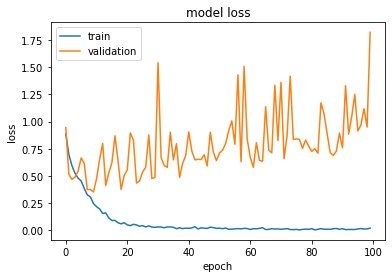

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

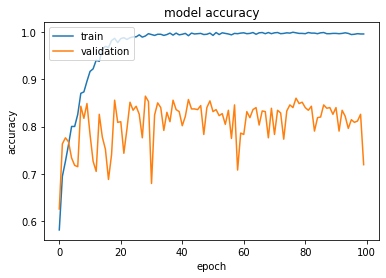

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()